# Lab 5: KNN Classification
----------------------------------

**Goals**:
 - Practice KNN classification in preparation for this week's homework.
 - Familiarize with the Kaggle interface and leaderboard.
 - Practice using cross-validation to find the optimal hyperparameter (useful for competitions).

 For this lab, we will use the archived smoker status prediction competition here:

https://www.kaggle.com/competitions/prediction-of-smoker-status-using-bio-signals

 Please join this competition, download the `train.csv` and `test.csv` files, and place them in the same folder as this notebook.

## Data Preprocessing

First, we need to standardize the features. Please fill in the code marked `TODO`.

In [2]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import time
import matplotlib.pyplot as plt

# Load train and test CSV files
# We'll only fit the model to the first 10,000 samples of the training data to save time.
train_data = pd.read_csv('train.csv')[:10000]
test_data = pd.read_csv('test.csv')

# Drop id column from the training dataset
train_data = train_data.drop(['id'], axis=1)

# Separate features (X) and target (y) from training data
X_train = train_data.drop('smoking', axis=1)
y_train = train_data['smoking']

In [3]:
train_data

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45,175,80,92.0,1.0,1.0,1,1,130,80,...,70,117,16.2,1,1.1,22,17,96,0,1
9996,55,170,75,88.0,0.6,0.5,1,1,113,73,...,45,146,16.1,1,1.0,28,30,41,0,1
9997,40,160,65,86.0,0.9,1.0,1,1,121,76,...,80,131,13.6,1,0.7,17,8,16,0,0
9998,60,150,55,80.0,1.0,0.8,1,1,148,95,...,66,109,14.5,1,0.7,27,16,15,0,0


In [9]:
# Identify numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a Pipeline object that applies the standard scaler to the numerical columns
# and the one hot encoder to the categorical columns; then applies the knn classifier (k=5).
# The model should match the given output of this cell.
# model = TODO

# Create a preprocessor that applies the StandardScaler to numerical columns and OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Create a pipeline that first applies the preprocessor and then KNeighborsClassifier with k=5
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])

# Train the model on the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index([], dtype='object'))])),
                ('knn', KNeighborsClassifier())])

## Cross Validation

Now, we want to determine the cross validation AUC score for varying values of `k`.

Complete the following code to plot the average validation AUC score vs. `k` and the average evaluation time per sample vs. `k`.

Validation Accuracy: 0.6639 with n_neighbors=1
Time taken: 0.40 seconds, Seconds per sample: 0.000040 seconds
Validation Accuracy: 0.7200 with n_neighbors=2
Time taken: 0.54 seconds, Seconds per sample: 0.000054 seconds
Validation Accuracy: 0.7470 with n_neighbors=3
Time taken: 0.67 seconds, Seconds per sample: 0.000067 seconds
Validation Accuracy: 0.7617 with n_neighbors=4
Time taken: 1.00 seconds, Seconds per sample: 0.000100 seconds
Validation Accuracy: 0.7717 with n_neighbors=5
Time taken: 1.01 seconds, Seconds per sample: 0.000101 seconds
Validation Accuracy: 0.7778 with n_neighbors=6
Time taken: 1.01 seconds, Seconds per sample: 0.000101 seconds
Validation Accuracy: 0.7822 with n_neighbors=7
Time taken: 1.01 seconds, Seconds per sample: 0.000101 seconds
Validation Accuracy: 0.7870 with n_neighbors=8
Time taken: 1.00 seconds, Seconds per sample: 0.000100 seconds
Validation Accuracy: 0.7914 with n_neighbors=9
Time taken: 1.00 seconds, Seconds per sample: 0.000100 seconds
Validation

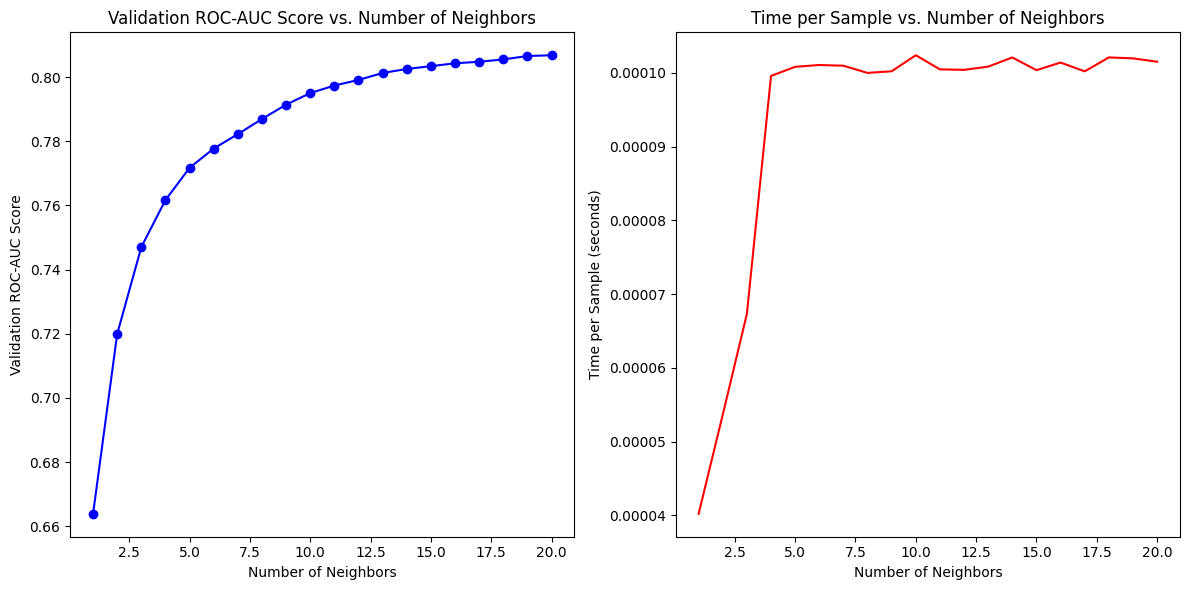

Best n_neighbors: 20 with Validation Accuracy: 0.8068


In [14]:
# Define the hyperparameter range for n_neighbors
n_neighbors_values = range(1, 21)  # Testing for neighbors from 1 to 20

# Store results
n_neighbors_list = []
auc_scores = []
times_per_sample = []

# Assume X_train and y_train are already defined as your training dataset
# X_train, y_train = ...

# Perform cross-validation over different values of n_neighbors
for n_neighbors in n_neighbors_values:
    # Define the model with the current n_neighbors
    model = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Measure the time taken for cross-validation
    start_time = time.time()

    # Perform 5-fold cross-validation and calculate mean validation AUC score.
    # The scoring='roc_auc' ensures that AUC is used for evaluation.
    mean_validation_score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()

    # Calculate elapsed time and seconds per sample
    elapsed_time = time.time() - start_time
    seconds_per_sample = elapsed_time / len(X_train)

    # Store results for plotting
    n_neighbors_list.append(n_neighbors)
    auc_scores.append(mean_validation_score)
    times_per_sample.append(seconds_per_sample)

    # Print out the validation accuracy, the value of n_neighbors, and the time per sample
    print(f'Validation Accuracy: {mean_validation_score:.4f} with n_neighbors={n_neighbors}')
    print(f'Time taken: {elapsed_time:.2f} seconds, Seconds per sample: {seconds_per_sample:.6f} seconds')

# Plotting results
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: AUC score vs number of neighbors
axs[0].plot(n_neighbors_list, auc_scores, marker='o', linestyle='-', color='b')
axs[0].set_xlabel('Number of Neighbors')
axs[0].set_ylabel('Validation ROC-AUC Score')
axs[0].set_title('Validation ROC-AUC Score vs. Number of Neighbors')

# Right plot: Time per sample vs number of neighbors
axs[1].plot(n_neighbors_list, times_per_sample, color='r')
axs[1].set_xlabel('Number of Neighbors')
axs[1].set_ylabel('Time per Sample (seconds)')
axs[1].set_title('Time per Sample vs. Number of Neighbors')

plt.tight_layout()
plt.show()

# Output the best hyperparameter
best_n_neighbors = n_neighbors_list[np.argmax(auc_scores)]
best_score = np.max(auc_scores)
print(f'Best n_neighbors: {best_n_neighbors} with Validation Accuracy: {best_score:.4f}')


## Submit to Kaggle

Using the optimal `k` you found, complete the following code to generate predictions on the test data.

Then, submit the `submission.csv` to Kaggle. Please show the TA both the plots generated above and the Kaggle submission result.

In [7]:
# Assume you have determined the optimal value for n_neighbors (k) through previous cross-validation
optimal_k = 5  # Replace 5 with the actual optimal value you found

# Create the model using the optimal k value
model = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the model on the training data
model.fit(X_train, y_train)

# For the test data, we also drop unnecessary columns but keep 'id' for the final submission
X_test = test_data.drop(['id'], axis=1)
test_ids = test_data['id']

# Make prediction on test data
y_pred = model.predict_proba(X_test)[:,-1]

# Create the submission DataFrame
submission = pd.DataFrame({'id': test_ids, 'smoking': y_pred})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' has been created!")

Submission file 'submission.csv' has been created!
